In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\shawn\AppData\Local\Temp\ipykernel_5452\3932538778.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing the dataset
# Wine dataset from https://archive.ics.uci.edu/dataset/186/wine+quality
df = pd.read_csv('winequality-red.csv', sep=";")
display(df.head())
display(df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: title={'center': 'Quality Counts'}, xlabel='quality', ylabel='count'>

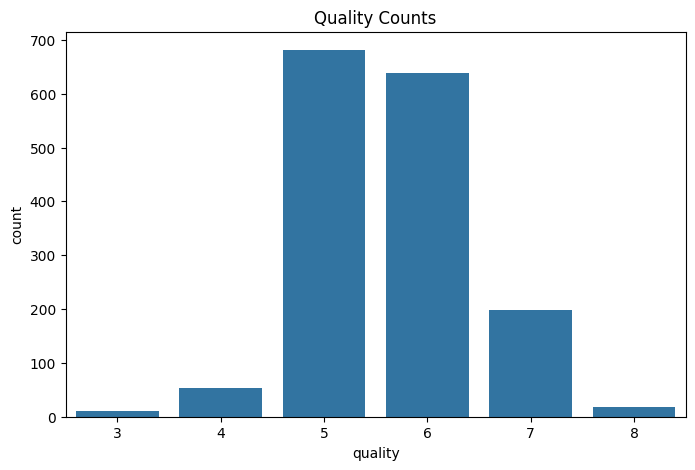

In [5]:
count_data = df['quality'].value_counts().sort_index().reset_index()
count_data.columns = ['quality', 'count']

plt.figure(figsize=(8, 5))
plt.title('Quality Counts')
sns.barplot(x='quality', y='count', data=count_data)

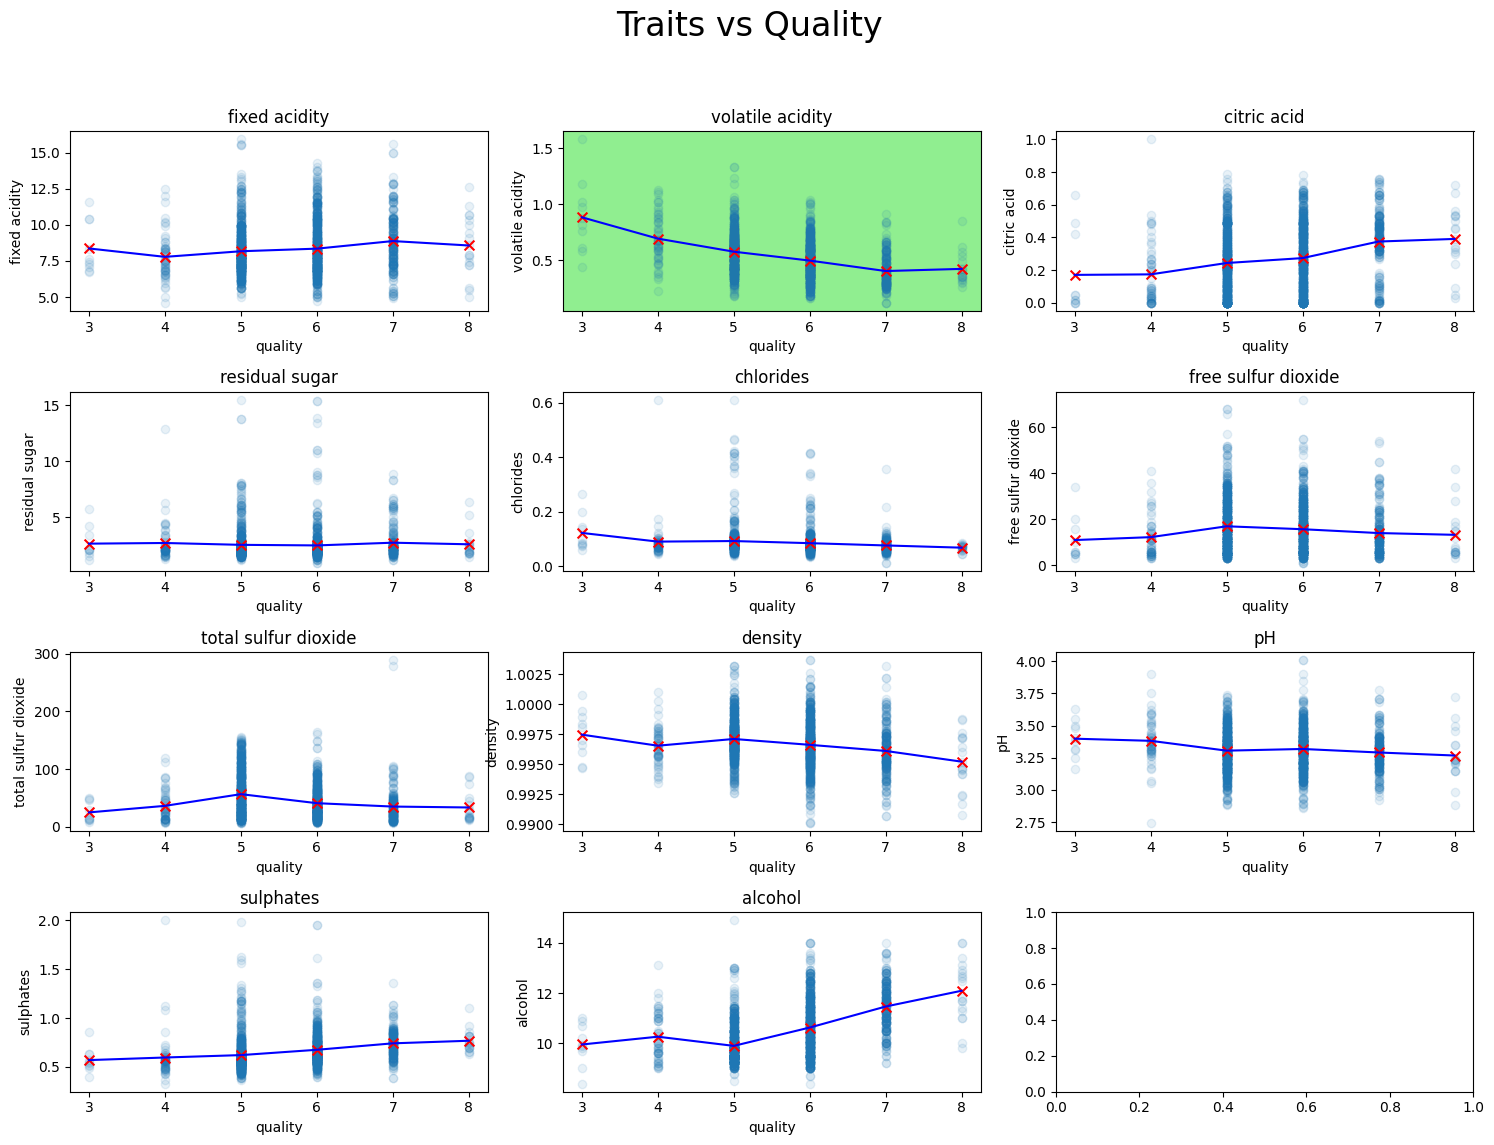

In [6]:
#create subplots to investigate each parameter against quality

fig, axs = plt.subplots(4, 3, figsize=(15, 12)) 
axs = axs.flatten()
plt.subplots_adjust(hspace=6)

#take every trait except quality
traits = df.columns[:-1]

for i in range(11):
    axs[i].set_title(traits[i])
    axs[i].set_ylabel(traits[i])
    axs[i].set_xlabel('quality')
    axs[i].scatter(df['quality'], df[traits[i]], alpha =0.1)  # Plot data with markers

    #for each quality val, plot mean
    for val in df['quality'].unique():
        axs[i].scatter(val, df[df['quality'] == val][traits[i]].mean(), marker = 'x', s = 50, c= 'r')

    unique_qualities = sorted(df['quality'].unique())  # Sort the unique quality values
    mean_values = [df[df['quality'] == val][traits[i]].mean() for val in unique_qualities]
    
    axs[i].plot(unique_qualities, mean_values, linestyle='-', color='blue')  # Line connecting points

axs[1].set_facecolor('lightgreen') #mark volatile acidity graph
fig.suptitle("Traits vs Quality", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

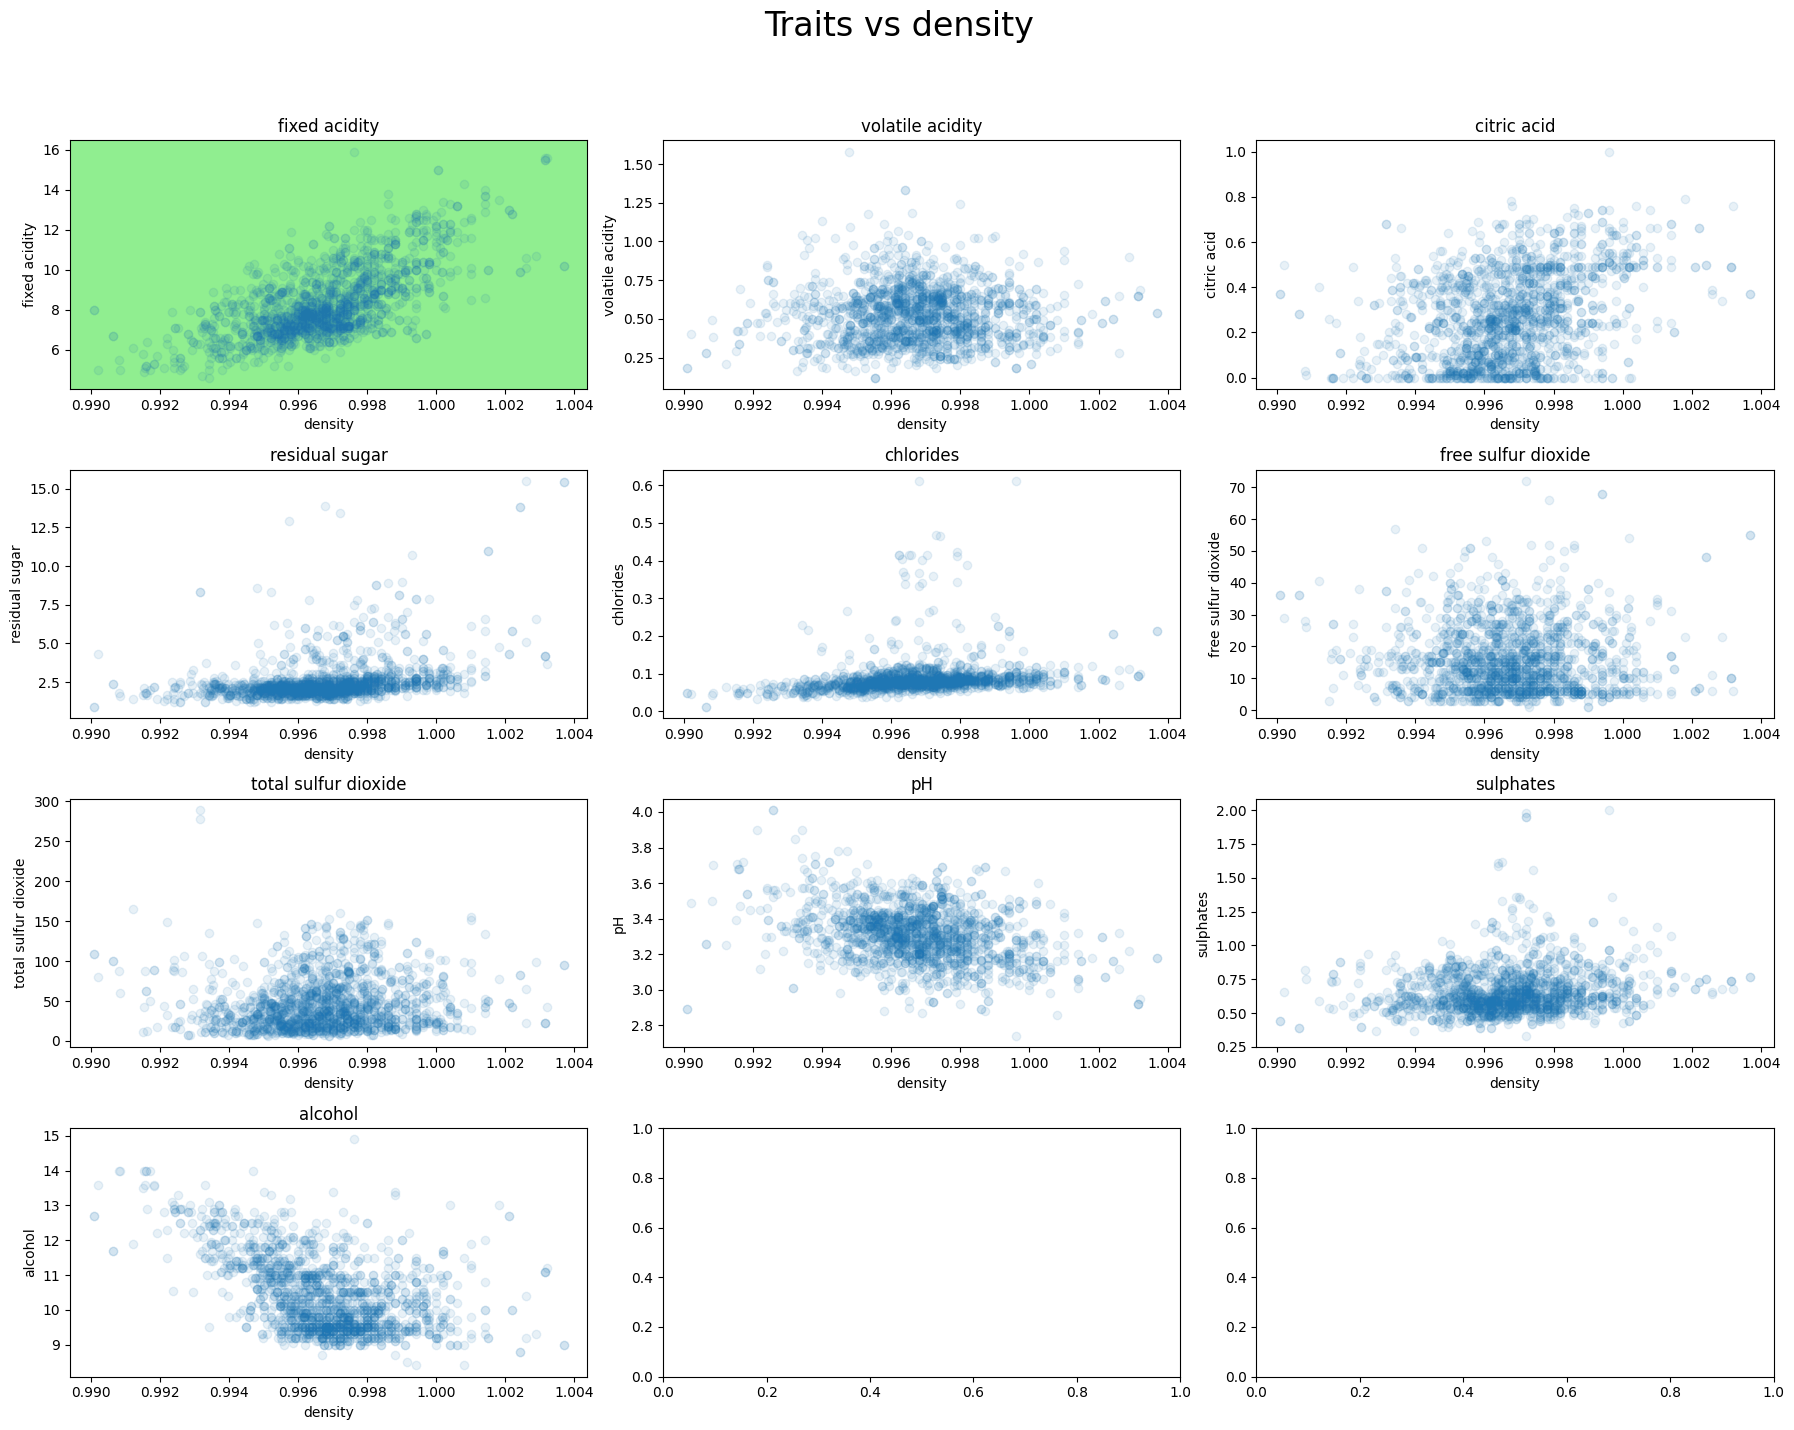

In [7]:
#investigate parameters against volatile acidity (not including quality)

attr = 'density'
traits = df.drop(columns = ['quality', attr]).columns

fig, axs = plt.subplots(4, 3, figsize=(18, 15)) 
axs = axs.flatten()
plt.subplots_adjust(hspace=6)

for i in range(10):
    axs[i].set_title(traits[i])
    axs[i].set_ylabel(traits[i])
    axs[i].set_xlabel(attr)
    axs[i].scatter(df[attr], df[traits[i]], alpha =0.1)  # Plot data with markers

axs[0].set_facecolor('lightgreen') # mark fixed acidity graph
fig.suptitle(f"Traits vs {attr}", fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Hypothesis Formulation
1. <b> The volatile acidity attribute has a negative correlation with quality. </b>
2. <b> The density attribute has a positive correlation with fixed acidity </b>

Mean Squared Error: 0.0027780487833584783
Pearson Correlation Coefficient: -0.9491194046998284


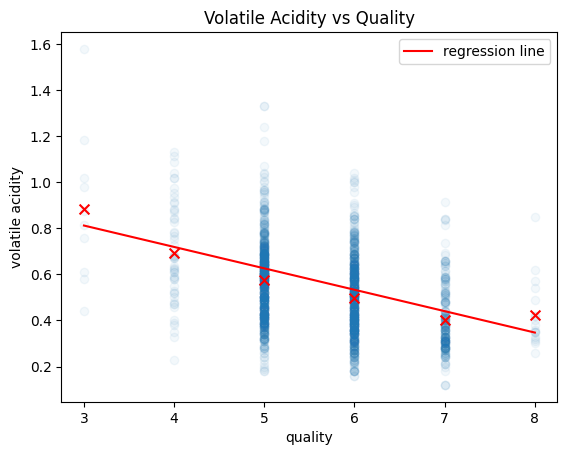

In [8]:
# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

# Compute regression on Volatile Acidity vs Quality (mean values)
unique_qualities = sorted(df['quality'].unique())  # Sort the unique quality values
mean_values = [df[df['quality'] == val]['volatile acidity'].mean() for val in unique_qualities]
X = df['quality'].sort_values().unique().reshape(-1,1)
y = mean_values
model = LinearRegression()
model.fit(X, y)

# Calculate MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Compute Pearson Correlation Coefficient
mean_df = pd.DataFrame({
    'quality': sorted(df['quality'].unique()),
    'mean_volatile_acidity': [df[df['quality'] == val]['volatile acidity'].mean() for val in sorted(df['quality'].unique())]
})
print(f'Pearson Correlation Coefficient: {mean_df['mean_volatile_acidity'].corr(mean_df['quality'])}')


# Volatile Acidity vs Quality Graph
plt.scatter(df['quality'], df['volatile acidity'] , alpha = 0.05)
for val in df['quality'].unique():
    plt.scatter(val, df[df['quality'] == val]['volatile acidity'].mean(), marker = 'x', s = 50, c = 'r')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.title('Volatile Acidity vs Quality')
plt.plot(X, model.predict(X), c = 'r', label = 'regression line')
plt.legend()

Mean Squared Error: 1.6774843637798658
Pearson Correlation Coefficient: 0.6680472921189735


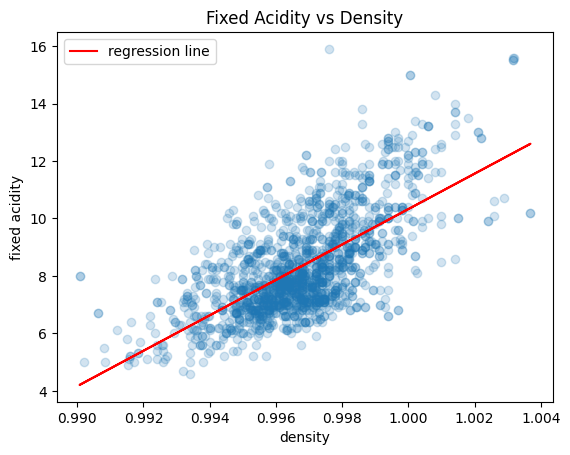

In [9]:
# Fixed Acidity vs Density Regression

# Linear Regression
X = df['density'].values.reshape(-1,1)
y = df['fixed acidity']
model = LinearRegression()
model.fit(X, y)

# Calculate MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Pearson Correlation Coefficient
print(f'Pearson Correlation Coefficient: {df['density'].corr(df['fixed acidity'])}')

# Plot
plt.scatter(df['density'], df['fixed acidity'], alpha = 0.2)
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.title('Fixed Acidity vs Density')

# Plot regression line
plt.plot(X, model.predict(X), c= 'r', label = 'regression line')
plt.legend()
plt.show()

# Extra Credit (Machine Learning)

In [10]:
# Random forests classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

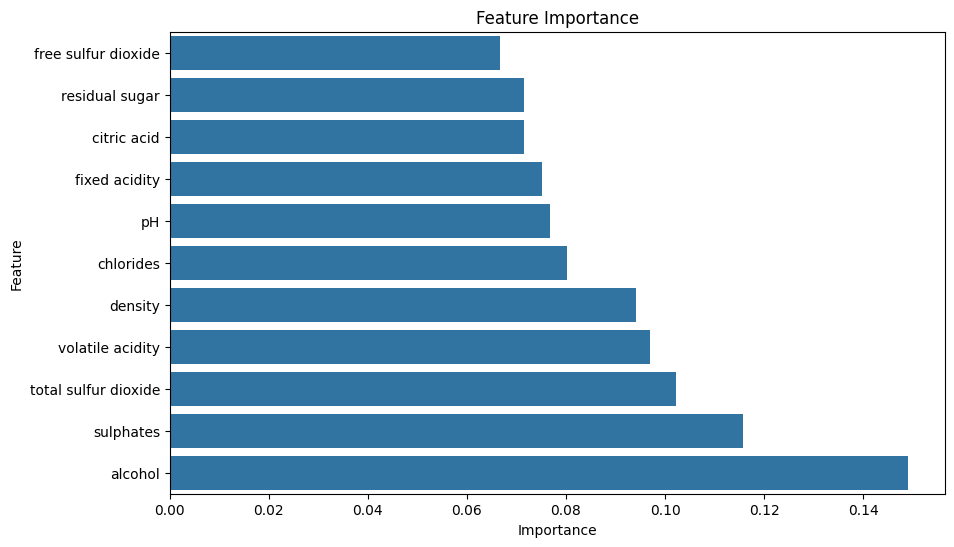

In [11]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


# Report
This project analyzes wine quality measurements from the UCI 'Wine Quality' dataset. The goal of this project is to investigate relationships between wine features as well as the quality measurements. To begin, the data was explored using basic methods such as .head(), .tail(), .info(), and .describe(). These provide a basic understanding of the dataset. Furthermore, the counts of various quality ratings were visualized. This is essential to the data, as quality is likely to be influenced by the rest of the features. From the bar chart for quality counts, it is clear that the majority of wines were rated either 5 or 6. <br><br> To further explore relationships, the quality and density attributes were chosen and compared against all other attributes of the set. These were compared using a basic scatter plot. For the scatter plot of quality against other attributes, red x's were used to denote the mean of each quality group and a blue line was drawn to connect the means. Based on this graph, it appeared that volatile acidity and quality were negatively correlated. For the scatter plot of density against other attributes, the relationship with fixed acidity appeared to be positively correlated. <b> Thus two hypotheses were formed: 1. Volatile acidity and quality are negatively correlated, and 2. Density and fixed acidity are positively correlated. </b><br><br> To investigate these hypotheses, the attributes were plotted against each other in a scatter plot. Using sci-kit learn's regression model, a line of best fit was drawn. In addition, the Pearson Correlation Coefficient was calculated by comparing corresponding columns with the .corr() method. Based on these findings, Volatile acidity and quality had a correlation coefficient of -0.94, indicating an extremely strong negative correlation. Fixed acidity and density had a correlation coefficient of 0.66, indicating a moderate to strong positive correlation. <b> Based on these results, both hypotheses can be confirmed true. </b> It is important to note, however, that for the volatile acidity and quality comparison, only the means of each quality group were used for the line of best fit and coefficient computations. This could explain the extremely high correlation. Finally, to explore the importances of each feature, a random forest model was trained on the dataset. Using the built in feature_importances_ of sci-kit learn, the relative importances were plotted in a bar chart where 'alcohol' appears to be the most important trait in determining quality.